In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_rows = 150
pd.options.display.max_columns = 30

In [2]:
trainset = pd.read_csv('D:/Study/Dataset/Credit Score/train.csv')
testset = pd.read_csv('D:/Study/Dataset/Credit Score/test.csv')

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\986606278.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  trainset = pd.read_csv('D:/Study/Dataset/Credit Score/train.csv')


In [3]:
{column: len(trainset[column].unique()) for column in trainset.columns}

{'ID': 100000,
 'Customer_ID': 12500,
 'Month': 8,
 'Name': 10140,
 'Age': 1788,
 'SSN': 12501,
 'Occupation': 16,
 'Annual_Income': 18940,
 'Monthly_Inhand_Salary': 13236,
 'Num_Bank_Accounts': 943,
 'Num_Credit_Card': 1179,
 'Interest_Rate': 1750,
 'Num_of_Loan': 434,
 'Type_of_Loan': 6261,
 'Delay_from_due_date': 73,
 'Num_of_Delayed_Payment': 750,
 'Changed_Credit_Limit': 4384,
 'Num_Credit_Inquiries': 1224,
 'Credit_Mix': 4,
 'Outstanding_Debt': 13178,
 'Credit_Utilization_Ratio': 100000,
 'Credit_History_Age': 405,
 'Payment_of_Min_Amount': 3,
 'Total_EMI_per_month': 14950,
 'Amount_invested_monthly': 91050,
 'Payment_Behaviour': 7,
 'Monthly_Balance': 98793,
 'Credit_Score': 3}

In [4]:
trainset1 = trainset.drop(['ID','Name','SSN','Occupation'],axis=1)
testset1 = testset.drop(['ID','Name','SSN','Occupation'],axis=1)

In [5]:
trainset1 = trainset1.replace(r'_','',regex=True)
testset1 = testset1.replace(r'_','',regex=True)
trainset1.Age = trainset1.Age.replace(r'_ -','',regex=True)
testset1.Age = testset1.Age.replace(r'_ -','',regex=True)
trainset1 = trainset1.replace('',np.nan)
testset1 = testset1.replace('',np.nan)

In [6]:
trainset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [7]:
display(trainset1.Payment_of_Min_Amount.value_counts(dropna=False))
display(" ")
display(trainset1.Payment_Behaviour.value_counts(dropna=False))
display(" ")
display(trainset1.Amount_invested_monthly.value_counts(dropna=False))

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

' '

LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
!@9#%8                           7600
Name: Payment_Behaviour, dtype: int64

' '

NaN                   4479
10000                 4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91050, dtype: int64

In [8]:
trainset1.Payment_of_Min_Amount = trainset1.Payment_of_Min_Amount.replace("NM",np.nan)
trainset1.Payment_Behaviour = trainset1.Payment_Behaviour.replace("!@9#%8",np.nan)
trainset1.Amount_invested_monthly = trainset1.Amount_invested_monthly.replace("10000",np.nan)
trainset1.Num_of_Loan = trainset1.Num_of_Loan.replace("-100",np.nan)

testset1.Payment_of_Min_Amount = testset1.Payment_of_Min_Amount.replace("NM",np.nan)
testset1.Payment_Behaviour = testset1.Payment_Behaviour.replace("!@9#%8",np.nan)
testset1.Amount_invested_monthly = testset1.Amount_invested_monthly.replace("10000",np.nan)
testset1.Num_of_Loan = testset1.Num_of_Loan.replace("-100",np.nan)

display(trainset1.Payment_of_Min_Amount.value_counts(dropna=False).sort_values(ascending=False))
display(" ")
display(trainset1.Payment_Behaviour.value_counts(dropna=False).sort_values(ascending=False))
display(" ")
display(trainset1.Amount_invested_monthly.value_counts(dropna=False).sort_values(ascending=False))
display(" ")
display(trainset1.Num_of_Loan.value_counts(dropna=False).sort_values(ascending=False))

Yes    52326
No     35667
NaN    12007
Name: Payment_of_Min_Amount, dtype: int64

' '

LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
NaN                              7600
Name: Payment_Behaviour, dtype: int64

' '

NaN                   8784
0.0                    169
38.73937670100975        1
84.95284817115969        1
178.3440674122349        1
                      ... 
251.67258219721603       1
173.2755025599617        1
215.48638555294247       1
125.95659173463726       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

' '

3      15104
2      15032
4      14743
0      10930
1      10606
       ...  
41         1
801        1
978        1
216        1
966        1
Name: Num_of_Loan, Length: 414, dtype: int64

In [9]:
trainset1.Type_of_Loan.value_counts(dropna=False)

NaN                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [10]:
trainset1.Type_of_Loan = trainset1.Type_of_Loan.fillna(trainset1.Type_of_Loan.mode()[0])
testset1.Type_of_Loan = testset1.Type_of_Loan.fillna(testset1.Type_of_Loan.mode()[0])

In [11]:
# NaN in Num_of_Loan now replaced with Not Specified
trainset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               96124 non-null   object 
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [12]:
trainset1.select_dtypes('O').columns

Index(['Customer_ID', 'Month', 'Age', 'Annual_Income', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [13]:
train2 = trainset1.copy()
test2 = testset1.copy()

In [14]:
for column in ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']:
    train2[column] = train2[column].astype('float')
    test2[column] = test2[column].astype('float')

In [15]:
train2.Credit_History_Age = train2.Credit_History_Age.str[:2].astype('float')
test2.Credit_History_Age = test2.Credit_History_Age.str[:2].astype('float')

In [16]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               96124 non-null   float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [17]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Month                     50000 non-null  object 
 2   Age                       50000 non-null  float64
 3   Annual_Income             50000 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               48026 non-null  float64
 9   Type_of_Loan              50000 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  float64
 12  Changed_Credit_Limit      48941 non-null  float64
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [18]:
#get list of numerical columns
train2.select_dtypes(exclude='O').columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [19]:
train3 = train2.copy()
test3 = test2.copy()

In [20]:
from scipy import stats

In [21]:
#find mode of each customer's Annual_Income & Amount_invested_monthly
train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x))

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\845272808.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x))


Customer_ID
CUS0x1000     ([77.31427572208112], [1])
CUS0x1009     ([58.66019164829086], [1])
CUS0x100b    ([174.28759775147847], [1])
CUS0x1011     ([71.22616847917206], [1])
CUS0x1013    ([159.12735996853058], [1])
                        ...             
CUS0xff3      ([23.35109287271675], [1])
CUS0xff4     ([53.104599112612064], [1])
CUS0xff6       ([350.543513167042], [1])
CUS0xffc       ([46.4256138380274], [1])
CUS0xffd      ([42.57571978536272], [1])
Name: Amount_invested_monthly, Length: 12500, dtype: object

In [22]:
#find the min and max of all of those modes
train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x)).apply([min, max])

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\240470807.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x)).apply([min, max])


min                  ([0.0], [1])
max    ([510.7262372637133], [1])
Name: Amount_invested_monthly, dtype: object

In [23]:
LowLim = train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
UpLim = train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x)).apply([max])[0][0]

display (LowLim,UpLim)

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\3664305283.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  LowLim = train3[train3.Amount_invested_monthly.notna()].groupby('Customer_ID').Amount_invested_monthly.apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\3664305283.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is t

array([0.])

array([510.72623726])

In [24]:
train3['Annual_Income'].apply(lambda x: np.nan if ((x<LowLim)|(x>UpLim)) else x).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Annual_Income, dtype: float64

In [25]:
for column in ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']:
    
        LowLim = train3[train3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
        UpLim = train3[train3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([max])[0][0]
        train3[column]=train3[column].apply(lambda x: np.nan if ((x<LowLim)|(x>UpLim)) else x)

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\1164762859.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  LowLim = train3[train3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\1164762859.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

In [26]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       97219 non-null   float64
 3   Annual_Income             99001 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         98676 non-null   float64
 6   Num_Credit_Card           97729 non-null   float64
 7   Interest_Rate             97966 non-null   float64
 8   Num_of_Loan               95652 non-null   float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       99757 non-null   float64
 11  Num_of_Delayed_Payment    92168 non-null   float64
 12  Changed_Credit_Limit      97529 non-null   float64
 13  Num_Credit_Inquiries      96385 non-null   fl

In [27]:
for column in ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']:
    
        LowLim = test3[test3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
        UpLim = test3[test3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([max])[0][0]
        test3[column]=test3[column].apply(lambda x: np.nan if ((x<LowLim)|(x>UpLim)) else x)

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\2423030458.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  LowLim = test3[test3[column].notna()].groupby('Customer_ID')[column].apply(list).apply(lambda x: stats.mode(x)).apply([min])[0][0]
C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\2423030458.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

In [28]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Month                     50000 non-null  object 
 2   Age                       49061 non-null  float64
 3   Annual_Income             49499 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         49365 non-null  float64
 6   Num_Credit_Card           48821 non-null  float64
 7   Interest_Rate             49034 non-null  float64
 8   Num_of_Loan               47768 non-null  float64
 9   Type_of_Loan              50000 non-null  object 
 10  Delay_from_due_date       49897 non-null  float64
 11  Num_of_Delayed_Payment    46107 non-null  float64
 12  Changed_Credit_Limit      48916 non-null  float64
 13  Num_Credit_Inquiries      48119 non-null  float64
 14  Credit

In [29]:
df = pd.concat([train3,test3],axis=0).reset_index(drop=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       146280 non-null  float64
 3   Annual_Income             148500 non-null  float64
 4   Monthly_Inhand_Salary     127500 non-null  float64
 5   Num_Bank_Accounts         148041 non-null  float64
 6   Num_Credit_Card           146550 non-null  float64
 7   Interest_Rate             147000 non-null  float64
 8   Num_of_Loan               143420 non-null  float64
 9   Type_of_Loan              150000 non-null  object 
 10  Delay_from_due_date       149654 non-null  float64
 11  Num_of_Delayed_Payment    138275 non-null  float64
 12  Changed_Credit_Limit      146445 non-null  float64
 13  Num_Credit_Inquiries      144504 non-null  f

In [31]:
train3.loc[:,train3.isna().sum()>0].columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [32]:
for column in [
    'Age','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 
    'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 
    'Credit_History_Age', 'Payment_of_Min_Amount','Total_EMI_per_month',
    'Payment_Behaviour']:
    
    df[column] = df.groupby('Customer_ID')[column].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else np.nan)

In [33]:
#Amount_invested_monthly & Monthly_Balance are imputed with mean instead of mode because there is no mode in the data of each customer
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  float64
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     150000 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  float64
 6   Num_Credit_Card           150000 non-null  float64
 7   Interest_Rate             150000 non-null  float64
 8   Num_of_Loan               150000 non-null  float64
 9   Type_of_Loan              150000 non-null  object 
 10  Delay_from_due_date       150000 non-null  float64
 11  Num_of_Delayed_Payment    150000 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      150000 non-null  f

In [35]:
df.Month = pd.to_datetime(df.Month, format='%B').dt.month

In [36]:
df.Credit_Mix.replace(['Bad','Standard','Good'],[1,2,3], inplace=True)
df.Payment_of_Min_Amount.replace(['No','Yes'],[0,1], inplace = True)

In [37]:
df.Payment_Behaviour.value_counts()

LowspentSmallvaluepayments      42046
HighspentMediumvaluepayments    29292
HighspentLargevaluepayments     22952
LowspentMediumvaluepayments     21676
HighspentSmallvaluepayments     17764
LowspentLargevaluepayments      16270
Name: Payment_Behaviour, dtype: int64

In [38]:
df2 =df.copy()

In [39]:
range(len(df2))

range(0, 150000)

In [40]:
df2['Spent'] = np.nan
df2['ValuePayments'] = np.nan

In [41]:
df3 = df2.copy()

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  int64  
 2   Age                       150000 non-null  float64
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     150000 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  float64
 6   Num_Credit_Card           150000 non-null  float64
 7   Interest_Rate             150000 non-null  float64
 8   Num_of_Loan               150000 non-null  float64
 9   Type_of_Loan              150000 non-null  object 
 10  Delay_from_due_date       150000 non-null  float64
 11  Num_of_Delayed_Payment    150000 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      150000 non-null  f

In [43]:
for i in range(len(df3)):
    if df3.Payment_Behaviour[i] == "LowspentSmallvaluepayments":
        df3.Spent[i]=0
        df3.ValuePayments[i]=0
    elif df3.Payment_Behaviour[i] == "HighspentMediumvaluepayments":
        df3.Spent[i]=1
        df3.ValuePayments[i]=1
    elif df3.Payment_Behaviour[i] == "HighspentLargevaluepayments":
        df3.Spent[i]=1
        df3.ValuePayments[i]=2
    elif df3.Payment_Behaviour[i] == "LowspentMediumvaluepayments":
        df3.Spent[i]=0
        df3.ValuePayments[i]=1 
    elif df3.Payment_Behaviour[i] == "HighspentSmallvaluepayments":
        df3.Spent[i]=1
        df3.ValuePayments[i]=0
    elif df3.Payment_Behaviour[i] == "LowspentLargevaluepayments":
        df3.Spent[i]=0
        df3.ValuePayments[i]=2
    else:
        pass

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\2810100574.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Spent[i]=1
C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\2810100574.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.ValuePayments[i]=0
C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\2810100574.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Spent[i]=0
C:\Users\Madhur\AppData\Local\Temp\ipyker

In [44]:
df4 = df3.drop('Payment_Behaviour',axis=1)
df4.sample(n=10)

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spent,ValuePayments
6503,CUS0x1f60,8,34.0,34266.080,3038.506667,8.0,9.0,21.0,6.0,"Payday Loan, Personal Loan, Payday Loan, Mortg...",17.0,10.0,10.07,7.0,2,1843.93,27.518295,11.0,1,161.844011,305.515721,126.490935,Poor,0.0,0.0
36035,CUS0x97e1,4,28.0,8113.060,732.088333,9.0,5.0,34.0,7.0,"Debt Consolidation Loan, Not Specified, Person...",51.0,16.0,17.65,9.0,1,3320.52,29.288242,7.0,1,40.056994,66.205338,256.946501,Poor,0.0,0.0
139819,CUS0xaa0b,12,26.0,72159.900,6048.325000,4.0,6.0,11.0,1.0,Auto Loan,22.0,16.0,9.88,9.0,2,1443.02,35.943830,17.0,1,33.977334,230.054443,590.800723,NaN,1.0,1.0
65215,CUS0x1015,8,27.0,46951.020,3725.585000,7.0,4.0,16.0,0.0,Not Specified,8.0,9.0,15.83,9.0,2,340.22,25.574896,21.0,1,0.000000,437.433995,225.124505,Good,0.0,0.0
74000,CUS0x4f29,1,37.0,18431.800,1543.983333,7.0,5.0,4.0,4.0,"Student Loan, Not Specified, Not Specified, an...",34.0,11.0,4.59,0.0,3,1405.43,24.387506,28.0,0,52.690040,22.982917,318.725377,Poor,1.0,2.0
77910,CUS0xa3ff,7,19.0,16888.405,1564.367083,6.0,6.0,16.0,1.0,Debt Consolidation Loan,29.0,14.0,11.17,0.0,2,724.57,23.077095,25.0,0,8.157936,134.804758,293.474015,Standard,0.0,1.0
123824,CUS0x81e6,9,21.0,22728.900,1773.075000,5.0,3.0,16.0,3.0,"Auto Loan, Payday Loan, and Debt Consolidation...",26.0,9.0,16.27,4.0,2,888.02,25.366986,25.0,1,42.191755,61.479430,363.636315,NaN,0.0,0.0
113725,CUS0x12fc,10,18.0,128450.320,10943.193333,1.0,5.0,4.0,3.0,"Home Equity Loan, Student Loan, and Personal Loan",5.0,2.0,6.66,4.0,3,23.79,34.470886,30.0,0,161.487532,266.477640,906.354161,NaN,1.0,2.0
112310,CUS0x12a8,11,44.0,103092.270,8311.022500,3.0,6.0,10.0,4.0,"Not Specified, Credit-Builder Loan, Debt Conso...",22.0,12.0,12.53,8.0,2,300.65,41.800038,13.0,1,328.604836,325.848173,596.717633,NaN,1.0,2.0
119510,CUS0x72b2,11,32.0,33669.700,3077.808333,5.0,7.0,14.0,6.0,"Credit-Builder Loan, Payday Loan, Not Specifie...",7.0,18.0,15.59,7.0,2,795.19,38.861806,14.0,1,159.990097,66.290738,321.499998,NaN,1.0,2.0


In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  int64  
 2   Age                       150000 non-null  float64
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     150000 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  float64
 6   Num_Credit_Card           150000 non-null  float64
 7   Interest_Rate             150000 non-null  float64
 8   Num_of_Loan               150000 non-null  float64
 9   Type_of_Loan              150000 non-null  object 
 10  Delay_from_due_date       150000 non-null  float64
 11  Num_of_Delayed_Payment    150000 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      150000 non-null  f

In [46]:
df4.Type_of_Loan = df4.Type_of_Loan.str.replace(' and ',' ')
df4.Type_of_Loan.sample(n=50)

117994    Mortgage Loan, Student Loan, Mortgage Loan, Au...
55885     Auto Loan, Debt Consolidation Loan, Debt Conso...
72944                                         Not Specified
67577     Auto Loan, Student Loan, Student Loan, Payday ...
123233                                         Student Loan
138894            Payday Loan, Personal Loan, Not Specified
21806     Home Equity Loan, Auto Loan, Mortgage Loan, Au...
14466                                      Home Equity Loan
43855            Home Equity Loan, Auto Loan, Not Specified
41782     Student Loan, Payday Loan, Not Specified, Payd...
125369                                        Not Specified
120978    Debt Consolidation Loan, Not Specified, Credit...
149964    Home Equity Loan, Auto Loan, Auto Loan, Auto Loan
62042     Auto Loan, Credit-Builder Loan, Not Specified,...
22547             Home Equity Loan, Auto Loan, Student Loan
140880           Mortgage Loan, Student Loan, Mortgage Loan
15360                                   

In [47]:
df4[71138:71144]

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spent,ValuePayments
71138,CUS0x446b,3,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",28.0,16.0,6.82,4.0,2,886.94,22.241086,31.0,0,19.874067,91.794727,269.370164,Standard,0.0,1.0
71139,CUS0x446b,4,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",24.0,16.0,6.82,4.0,2,886.94,30.135441,32.0,0,19.874067,22.694007,298.470884,Standard,1.0,2.0
71140,CUS0x446b,5,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",26.0,19.0,6.82,4.0,2,886.94,27.784261,32.0,0,19.874067,96.476760,264.688132,Standard,0.0,1.0
71141,CUS0x446b,6,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",28.0,14.0,13.82,4.0,2,886.94,27.405091,32.0,0,19.874067,73.639853,287.525039,Standard,0.0,1.0
71142,CUS0x446b,7,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",28.0,18.0,6.82,6.0,2,886.94,25.380414,32.0,0,19.874067,83.385727,277.844114,Standard,0.0,0.0
71143,CUS0x446b,8,30.0,11944.675,1010.389583,5.0,7.0,6.0,3.0,"Auto Loan, Auto Loan, Auto Loan",28.0,17.0,6.82,6.0,2,886.94,25.383547,32.0,0,19.874067,132.319857,238.845034,Standard,0.0,0.0


In [48]:
df5 = df4.Type_of_Loan.str.get_dummies(sep=', ').rename(lambda x: 'Type_'+x, axis='columns')
df5[71138:71144]

,Type_Auto Loan,Type_Credit-Builder Loan,Type_Debt Consolidation Loan,Type_Home Equity Loan,Type_Mortgage Loan,Type_Not Specified,Type_Payday Loan,Type_Personal Loan,Type_Student Loan
71138,1,0,0,0,0,0,0,0,0
71139,1,0,0,0,0,0,0,0,0
71140,1,0,0,0,0,0,0,0,0
71141,1,0,0,0,0,0,0,0,0
71142,1,0,0,0,0,0,0,0,0
71143,1,0,0,0,0,0,0,0,0


In [49]:
df6 = df4.join(df5).drop(['Type_of_Loan','Type_Not Specified'],axis=1)
df6.sample(n=10)

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spent,ValuePayments,Type_Auto Loan,Type_Credit-Builder Loan,Type_Debt Consolidation Loan,Type_Home Equity Loan,Type_Mortgage Loan,Type_Payday Loan,Type_Personal Loan,Type_Student Loan
69712,CUS0xa4ad,1,24.0,125079.040,10197.253333,6.0,7.0,17.0,1.0,9.0,19.0,13.14,4.0,2,1029.08,...,0,88.810978,428.229517,392.857082,Standard,0.0,1.0,0,0,0,0,0,0,0,1
12964,CUS0x62ec,5,24.0,20060.930,1806.744167,7.0,6.0,14.0,5.0,21.0,17.0,12.21,9.0,2,1445.82,...,1,48.564731,75.406329,326.703357,Standard,0.0,2.0,1,0,0,0,0,0,1,1
101250,CUS0x79b,11,27.0,55000.620,4526.385000,3.0,6.0,12.0,0.0,18.0,16.0,5.88,0.0,2,815.35,...,0,0.000000,83.767577,608.870923,NaN,1.0,2.0,0,0,0,0,0,0,0,0
102290,CUS0x7a10,11,24.0,37788.300,3097.025000,3.0,4.0,9.0,2.0,11.0,0.0,1.40,8.0,3,1124.37,...,0,39.655554,210.974731,349.072215,NaN,0.0,0.0,0,1,1,0,0,0,0,0
93208,CUS0x9b24,1,20.0,19287.935,1399.327917,2.0,7.0,7.0,2.0,3.0,12.0,7.69,0.0,3,102.81,...,0,29.179343,68.646308,322.107141,Standard,0.0,1.0,0,1,0,0,0,0,0,0
10291,CUS0x4636,4,35.0,57196.560,4838.380000,6.0,3.0,17.0,3.0,12.0,12.0,7.53,4.0,2,1269.70,...,1,74.304484,233.427357,150.609702,Poor,0.0,0.0,0,1,0,1,0,0,0,0
55204,CUS0x24ee,5,38.0,15496.420,1059.368333,7.0,7.0,25.0,7.0,55.0,19.0,8.65,7.0,1,1883.54,...,1,72.706679,47.820677,245.409477,Poor,1.0,0.0,0,1,1,1,1,0,0,0
70918,CUS0xbe12,7,30.0,28308.780,2552.065000,9.0,6.0,22.0,7.0,46.0,14.0,9.90,8.0,2,2139.23,...,1,139.516443,46.134132,309.555925,Poor,1.0,2.0,0,1,1,0,1,0,1,0
39783,CUS0x3e79,8,30.0,9956.155,780.679583,7.0,10.0,34.0,5.0,26.0,20.0,29.30,11.0,1,4277.82,...,1,38.862489,69.228169,259.977301,Poor,0.0,0.0,0,0,1,0,1,1,1,0
979,CUS0x6015,4,17.0,19163.220,1346.935000,3.0,7.0,7.0,2.0,18.0,19.0,8.76,5.0,2,2226.37,...,1,24.175648,35.393214,325.124638,Good,1.0,1.0,0,0,0,0,0,1,1,0


In [50]:
#Moving target column 'Credit_Score' to the right
df7 = df6.copy()
df7['CreditScore']=df7.Credit_Score

In [51]:
df7 = df7.drop('Credit_Score',axis=1)

In [52]:
df_train = df7[df7.CreditScore.notna()]
df_test = df7[df7.CreditScore.isnull()]

In [53]:
display(df_train.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Customer_ID                   100000 non-null  object 
 1   Month                         100000 non-null  int64  
 2   Age                           100000 non-null  float64
 3   Annual_Income                 100000 non-null  float64
 4   Monthly_Inhand_Salary         100000 non-null  float64
 5   Num_Bank_Accounts             100000 non-null  float64
 6   Num_Credit_Card               100000 non-null  float64
 7   Interest_Rate                 100000 non-null  float64
 8   Num_of_Loan                   100000 non-null  float64
 9   Delay_from_due_date           100000 non-null  float64
 10  Num_of_Delayed_Payment        100000 non-null  float64
 11  Changed_Credit_Limit          100000 non-null  float64
 12  Num_Credit_Inquiries          100000 non-null

None

None

In [54]:
df_train.CreditScore.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [55]:
df_train.CreditScore.replace(['Poor','Standard','Good'],[1,2,3],inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Customer_ID                   100000 non-null  object 
 1   Month                         100000 non-null  int64  
 2   Age                           100000 non-null  float64
 3   Annual_Income                 100000 non-null  float64
 4   Monthly_Inhand_Salary         100000 non-null  float64
 5   Num_Bank_Accounts             100000 non-null  float64
 6   Num_Credit_Card               100000 non-null  float64
 7   Interest_Rate                 100000 non-null  float64
 8   Num_of_Loan                   100000 non-null  float64
 9   Delay_from_due_date           100000 non-null  float64
 10  Num_of_Delayed_Payment        100000 non-null  float64
 11  Changed_Credit_Limit          100000 non-null  float64
 12  Num_Credit_Inquiries          100000 non-null

C:\Users\Madhur\AppData\Local\Temp\ipykernel_27996\3679180898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.CreditScore.replace(['Poor','Standard','Good'],[1,2,3],inplace=True)


In [56]:
train_data = df_train[df_train.Month<7]
test_data = df_train[df_train.Month>6]


Xtrain = train_data.drop(['Customer_ID','CreditScore'],axis=1).copy()
Xtest = test_data.drop(['Customer_ID','CreditScore'],axis=1).copy()

Ytrain = train_data.CreditScore.copy()
Ytest = test_data.CreditScore.copy()

In [57]:
display(Xtrain,Xtest)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spent,ValuePayments,Type_Auto Loan,Type_Credit-Builder Loan,Type_Debt Consolidation Loan,Type_Home Equity Loan,Type_Mortgage Loan,Type_Payday Loan,Type_Personal Loan,Type_Student Loan
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,3,809.98,26.822620,22.0,0,49.574949,80.415295,312.494089,1.0,0.0,1,1,0,1,0,0,1,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,4.0,3,809.98,31.944960,22.0,0,49.574949,118.280222,284.629162,0.0,2.0,1,1,0,1,0,0,1,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,3,809.98,28.609352,22.0,0,49.574949,81.699521,331.209863,0.0,1.0,1,1,0,1,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,3,809.98,31.377862,22.0,0,49.574949,199.458074,223.451310,0.0,0.0,1,1,0,1,0,0,1,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,3,809.98,24.797347,22.0,0,49.574949,41.420153,341.489231,1.0,1.0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,6.0,11.50,3.0,3,502.38,29.135447,31.0,0,35.104023,180.733095,400.104466,0.0,1.0,1,0,0,0,0,0,0,1
99994,3,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,9.50,3.0,3,502.38,27.758522,31.0,0,35.104023,140.581403,410.256158,1.0,1.0,1,0,0,0,0,0,0,1
99995,4,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,3,502.38,34.663572,31.0,0,35.104023,60.971333,479.866228,1.0,2.0,1,0,0,0,0,0,0,1
99996,5,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,3,502.38,27.758522,31.0,0,35.104023,54.185950,496.651610,1.0,1.0,1,0,0,0,0,0,0,1


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spent,ValuePayments,Type_Auto Loan,Type_Credit-Builder Loan,Type_Debt Consolidation Loan,Type_Home Equity Loan,Type_Mortgage Loan,Type_Payday Loan,Type_Personal Loan,Type_Student Loan
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,11.27,4.0,3,809.98,22.537593,22.0,0,49.574949,178.344067,244.565317,0.0,0.0,1,1,0,1,0,0,1,0
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,11.27,4.0,3,809.98,23.933795,22.0,0,49.574949,24.785217,358.124168,1.0,1.0,1,1,0,1,0,0,1,0
14,7,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,3,605.03,31.131702,27.0,0,18.816215,70.101774,464.880678,1.0,1.0,0,1,0,0,0,0,0,0
15,8,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,5.42,2.0,3,605.03,32.933856,27.0,0,18.816215,218.904344,356.078109,0.0,0.0,0,1,0,0,0,0,0,0
22,7,34.0,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,7.10,3.0,3,1303.01,38.068624,18.0,0,246.992319,263.174163,968.555517,1.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,8,50.0,37188.10,3097.008333,1.0,4.0,5.0,3.0,7.0,9.0,5.38,3.0,3,620.64,23.986021,30.0,0,84.205949,42.935566,432.559318,1.0,1.0,0,0,0,1,1,0,0,1
99990,7,28.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,26.0,18.31,9.0,1,3571.70,25.123535,6.0,1,60.964772,173.275503,228.750392,0.0,2.0,1,0,0,0,1,0,1,1
99991,8,29.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,25.0,18.31,9.0,1,3571.70,37.140784,6.0,1,60.964772,34.662906,337.362988,1.0,2.0,1,0,0,0,1,0,1,1
99998,7,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,3,502.38,33.638208,31.0,0,35.104023,251.672582,319.164979,0.0,2.0,1,0,0,0,0,0,0,1


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain),columns=Xtrain.columns)
Xtest = pd.DataFrame(scaler.fit_transform(Xtest),columns=Xtest.columns)

In [60]:
display(Xtrain,Ytrain)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spent,ValuePayments,Type_Auto Loan,Type_Credit-Builder Loan,Type_Debt Consolidation Loan,Type_Home Equity Loan,Type_Mortgage Loan,Type_Payday Loan,Type_Personal Loan,Type_Student Loan
0,-1.46385,-0.951053,-0.819625,-0.744894,-0.913364,-0.742233,-1.319266,0.190946,-1.217048,-1.002979,0.131897,-0.411616,1.274171,-0.533485,-0.714409,0.491371,-1.210371,-0.44167,-0.728038,0.008307,1.071339,-1.076194,1.507399,1.466898,-0.670907,1.478078,-0.675926,-0.685112,1.488295,-0.670907
1,-0.87831,-0.951053,-0.819625,-0.744894,-0.913364,-0.742233,-1.319266,0.190946,-1.486647,-1.479347,0.131897,-0.411616,1.274171,-0.533485,0.425210,0.491371,-1.210371,-0.44167,-0.390654,0.008307,-0.933412,1.420931,1.507399,1.466898,-0.670907,1.478078,-0.675926,-0.685112,1.488295,-0.670907
2,-0.29277,-0.951053,-0.819625,-0.744894,-0.913364,-0.742233,-1.319266,0.190946,-1.217048,-1.002979,0.131897,-0.411616,1.274171,-0.533485,-0.316896,0.491371,-1.210371,-0.44167,-0.716595,0.008307,-0.933412,0.172368,1.507399,1.466898,-0.670907,1.478078,-0.675926,-0.685112,1.488295,-0.670907
3,0.29277,-0.951053,-0.819625,-0.744894,-0.913364,-0.742233,-1.319266,0.190946,-1.082249,-1.479347,-0.611132,-0.411616,1.274171,-0.533485,0.299042,0.491371,-1.210371,-0.44167,0.332657,0.008307,-0.933412,-1.076194,1.507399,1.466898,-0.670907,1.478078,-0.675926,-0.685112,1.488295,-0.670907
4,0.87831,-0.951053,-0.819625,-0.744894,-0.913364,-0.742233,-1.319266,0.190946,-1.014850,-1.479347,0.131897,-0.411616,1.274171,-0.533485,-1.164992,0.491371,-1.210371,-0.44167,-1.075493,0.008307,1.071339,0.172368,1.507399,1.466898,-0.670907,1.478078,-0.675926,-0.685112,1.488295,-0.670907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,-0.87831,-0.765229,-0.283978,-0.263567,-0.527757,0.225720,-0.861667,-0.626600,0.130943,-1.161768,0.166077,-0.674937,1.274171,-0.799776,-0.199851,1.573984,-1.210371,-0.55717,0.165814,0.008307,-0.933412,0.172368,1.507399,-0.681711,-0.670907,-0.676554,-0.675926,-0.685112,-0.671910,1.490520
74996,-0.29277,-0.765229,-0.283978,-0.263567,-0.527757,0.225720,-0.861667,-0.626600,-0.071256,-1.161768,-0.131135,-0.674937,1.274171,-0.799776,-0.506189,1.573984,-1.210371,-0.55717,-0.191946,0.008307,1.071339,0.172368,1.507399,-0.681711,-0.670907,-0.676554,-0.675926,-0.685112,-0.671910,1.490520
74997,0.29277,-0.765229,-0.283978,-0.263567,-0.527757,0.225720,-0.861667,-0.626600,0.130943,-1.002979,0.166077,-0.674937,1.274171,-0.799776,1.030047,1.573984,-1.210371,-0.55717,-0.901288,0.008307,1.071339,1.420931,1.507399,-0.681711,-0.670907,-0.676554,-0.675926,-0.685112,-0.671910,1.490520
74998,0.87831,-0.765229,-0.283978,-0.263567,-0.527757,0.225720,-0.861667,-0.626600,-0.206055,-1.002979,0.166077,-0.674937,1.274171,-0.799776,-0.506189,1.573984,-1.210371,-0.55717,-0.961747,0.008307,1.071339,0.172368,1.507399,-0.681711,-0.670907,-0.676554,-0.675926,-0.685112,-0.671910,1.490520


0        3
1        3
2        3
3        3
4        3
        ..
99993    2
99994    1
99995    1
99996    1
99997    1
Name: CreditScore, Length: 75000, dtype: int64

In [61]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
models = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(Xtrain, Ytrain)

In [63]:
model_names = [
    "Support Vector: ",
    "Decision Tree: ",
    "Random Forest: "
]

for model, name in zip(models, model_names):
    print(name + "{:.4f}%".format(model.score(Xtest, Ytest) * 100))

Support Vector: 65.3800%
Decision Tree: 65.8560%
Random Forest: 72.6480%


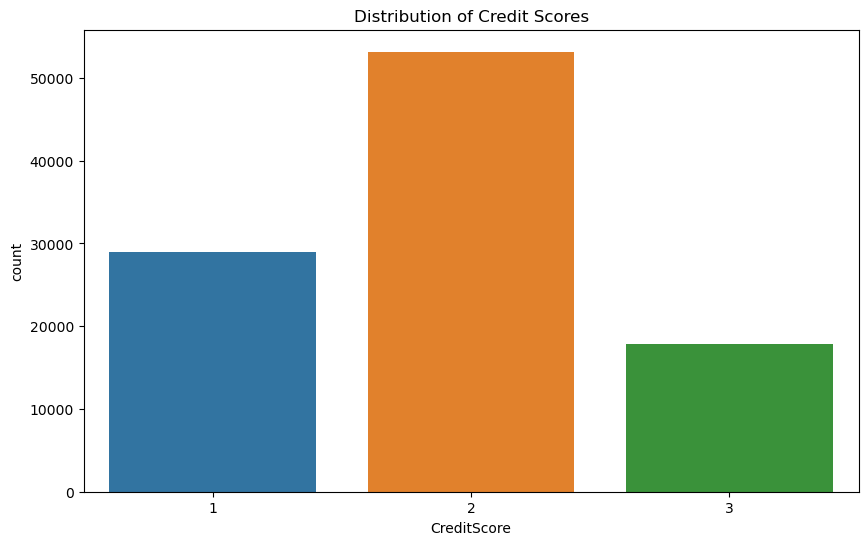

In [67]:
# Plotting results
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditScore', data=df_train)
plt.title('Distribution of Credit Scores')
plt.show()

In [68]:
# Interactive Feature for Testing
def test_model(input_data):
    input_df = pd.DataFrame(input_data, index=[0])
    input_df = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)
    predictions = {name: model.predict(input_df)[0] for model, name in zip(models, model_names)}
    return predictions

In [89]:
input_data = {
    'Month': 1,
    'Age': 35,
    'Annual_Income': 60000,
    'Monthly_Inhand_Salary': 5000,
    'Num_Bank_Accounts': 2,
    'Num_Credit_Card': 3,
    'Interest_Rate': 12,
    'Num_of_Loan': 1,
    'Delay_from_due_date': 2,
    'Num_of_Delayed_Payment': 1,
    'Changed_Credit_Limit': 1000,
    'Num_Credit_Inquiries': 1,
    'Credit_Mix': 2,
    'Outstanding_Debt': 15000,
    'Credit_Utilization_Ratio': 30,
    'Credit_History_Age': 10,
    'Payment_of_Min_Amount': 1,
    'Total_EMI_per_month': 2000,
    'Amount_invested_monthly': 300,
    'Monthly_Balance': 1000,
    'Spent': 0,  
    'ValuePayments': 0, 
    'Type_Auto Loan': 0,
    'Type_Credit-Builder Loan': 0,
    'Type_Debt Consolidation Loan': 0,
    'Type_Home Equity Loan': 0,
    'Type_Mortgage Loan': 0,
    'Type_Payday Loan': 0,
    'Type_Personal Loan': 0,
    'Type_Student Loan': 0,
}
# Test the model with example input
print(test_model(input_data))

{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}


In [91]:
input_data = pd.read_csv('D:/Study/Dataset/Credit Score/test_data.csv')

# Convert the input data to a dictionary
input_dict = input_data.to_dict('records')[0]

# Test the model with the input data
predictions = test_model(input_dict)

# Print the predictions
print(predictions)

{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}


In [94]:
import pandas as pd

# Load the CSV file
input_data = pd.read_csv('D:/Study/Dataset/Credit Score/test_data_1.csv')

# Test the model with each row of data
predictions = []
for index, row in input_data.iterrows():
    input_dict = row.to_dict()
    predictions.append(test_model(input_dict))

# Print the predictions
for prediction in predictions:
    print(prediction)

{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}
{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}
{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}
{'Support Vector: ': 1, 'Decision Tree: ': 2, 'Random Forest: ': 2}
{'Support Vector: ': 1, 'Decision Tree: ': 3, 'Random Forest: ': 2}
